# **regresion lineal multiple**

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [52]:
data = pd.read_csv('./diamonds.csv')

In [53]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [54]:
#cambiando los parametros de las columnas con valores string a avalores numericos
cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
data['cut'] = data['cut'].map(cut)


color = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
data['color'] = data['color'].map(color)


clarity = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
data['clarity'] = data['clarity'].map(clarity)



In [55]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [56]:
X = data[['carat','cut','color','clarity','depth','table','x','y','z']].values
y = data['price'].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m_train = y_train.size  
m_test = y_test.size   

print(" x train:", X_train.shape)
print(" x test:", X_test.shape)
print(" y train:", y_train.shape)
print(" y test:", y_test.shape)

 x train: (43152, 9)
 x test: (10788, 9)
 y train: (43152,)
 y test: (10788,)


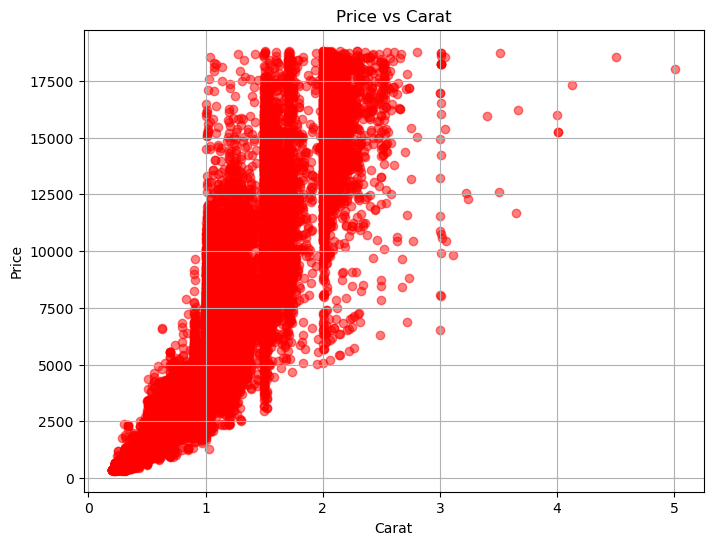

In [58]:
# Función para graficar
def plotData(x, y, xlabel="Feature", ylabel="Price"):
    pyplot.figure(figsize=(8,6))
    pyplot.scatter(x, y, color='red', marker='o', alpha=0.5)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.title(f"{ylabel} vs {xlabel}")
    pyplot.grid(True)
    pyplot.show()


plotData(X[:, 0], y, xlabel="Carat", ylabel="Price")

In [59]:
# normalizacion de los datos
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    # Avoid division by zero
    sigma[sigma == 0] = 1
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalize features (use training set statistics for both train and test)
X_train_norm, mu, sigma = featureNormalize(X_train)
X_test_norm = (X_test - mu) / sigma  # Normalize test set with train statistics
print("Normalized training features sample:\n", X_train_norm[:5])

Normalized training features sample:
 [[ 2.56005606 -1.70896512  0.3479487  -1.24690075 -2.55074762  2.93386055
   2.22945022  2.13820916  1.73820671]
 [ 0.44739205 -0.81219173  0.93662126 -1.24690075 -1.22042647  1.13957453
   0.74754991  0.65671016  0.5377332 ]
 [ 0.63753181  0.08458166 -0.82939642 -0.03213422  0.52999608  0.24243153
   0.76540413  0.70028366  0.79195112]
 [ 1.48259742 -1.70896512  0.93662126 -1.24690075 -0.17017294  3.38243206
   1.31888497  1.24930976  1.24389409]
 [ 1.5248507  -0.81219173 -0.24072386  0.57524904  0.24992847 -0.20613998
   1.37244763  1.38003026  1.39924948]]


añadimos la columnas de unos 

In [60]:
X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print("Training shape with intercept term:", X_train_norm.shape)
print("Test shape with intercept term:", X_test_norm.shape)

Training shape with intercept term: (43152, 10)
Test shape with intercept term: (10788, 10)


In [61]:
# funcion de costo para multiples variables
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [62]:
# funcion de desenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - (alpha / m) * np.dot((h - y), X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

entrenamiento del modelo 

In [63]:
# entrenamiento del modelo

alpha = 0.001 
num_iters = 10000  
thetaMul = np.zeros(X_train_norm.shape[1]) 
thetaMul, J_history = gradientDescentMulti(X_train_norm, y_train, thetaMul, alpha, num_iters)

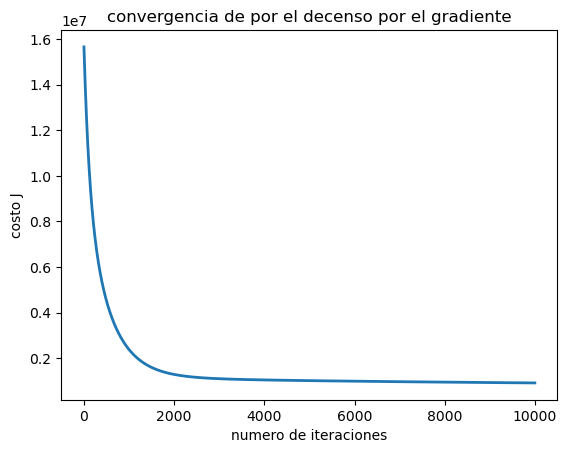

Theta calculada por el decendo de gradiente: [3939.31274729 2371.45514642  148.50649197  483.26541028  866.26350033
   -6.12249401  -26.24909561  850.18334818  450.11162712  438.74847821]


In [64]:
# Plot convergence of cost function
pyplot.figure()
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('numero de iteraciones')
pyplot.ylabel('costo J')
pyplot.title('convergencia de por el decenso por el gradiente')
pyplot.show()

# Display results
print('Theta calculada por el decendo de gradiente:', thetaMul)

In [65]:
# Evaluacion del train
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_train_pred = np.dot(X_train_norm, thetaMul)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nMétricas en el conjunto de prueba:")
print(f'R² (coeficiente de determinación): {r2_train:.4f}')
print(f'Error cuadrático medio (MSE): {mse_train:.4f}')
print(f'Error absoluto medio (MAE): {mae_train:.4f}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse_train:.4f}')


Métricas en el conjunto de prueba:
R² (coeficiente de determinación): 0.8846
Error cuadrático medio (MSE): 1837113.7826
Error absoluto medio (MAE): 983.2062
Raíz del error cuadrático medio (RMSE): 1355.4017


In [66]:
# Evaluacion del test
y_test_pred = np.dot(X_test_norm, thetaMul)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\nMétricas en el conjunto de prueba:")
print(f'R² (coeficiente de determinación): {r2_test:.4f}')
print(f'Error cuadrático medio (MSE): {mse_test:.4f}')
print(f'Error absoluto medio (MAE): {mae_test:.4f}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse_test:.4f}')



Métricas en el conjunto de prueba:
R² (coeficiente de determinación): 0.8862
Error cuadrático medio (MSE): 1808722.7212
Error absoluto medio (MAE): 979.8762
Raíz del error cuadrático medio (RMSE): 1344.8876


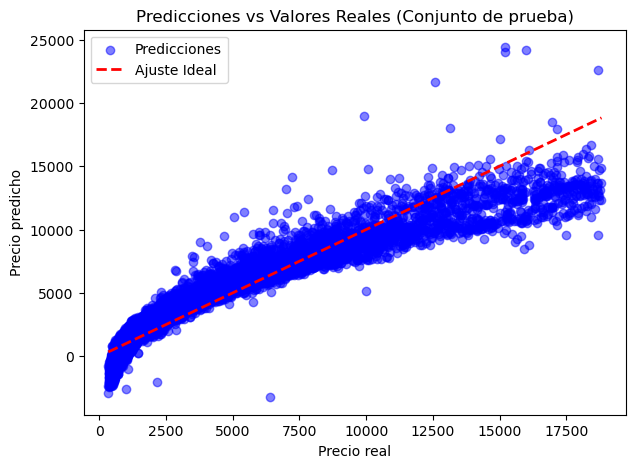

In [67]:
import matplotlib.pyplot as plt

# Gráfico: valores reales vs predicciones en el conjunto de prueba
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ajuste Ideal')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones vs Valores Reales (Conjunto de prueba)')
plt.legend()
plt.show()


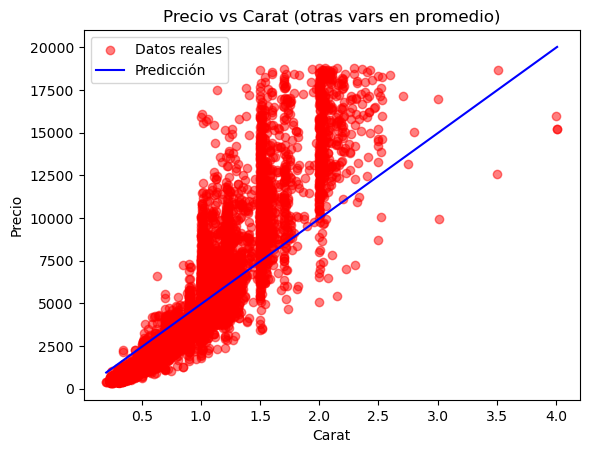

In [68]:
# Precio vs Carat con otras variables en su promedio
feature_idx = 0  # carat
plt.figure()
plt.scatter(X_test[:, feature_idx], y_test, color='red', alpha=0.5, label='Datos reales')

# Rango de carat
X_range = np.linspace(X_test[:, feature_idx].min(), X_test[:, feature_idx].max(), 100)

# Crear matriz con todas las features en su promedio
X_range_full = np.tile(mu, (100,1))  
X_range_full[:, feature_idx] = X_range  # variar solo carat

# Normalizar
X_range_norm = (X_range_full - mu) / sigma
X_range_norm = np.concatenate([np.ones((X_range_norm.shape[0], 1)), X_range_norm], axis=1)

# Predicciones
y_pred_range = np.dot(X_range_norm, thetaMul)

plt.plot(X_range, y_pred_range, '-', color='blue', label='Predicción')
plt.xlabel('Carat')
plt.ylabel('Precio')
plt.title('Precio vs Carat (otras vars en promedio)')
plt.legend()
plt.show()


# **Ecuacion de la normal**

In [69]:
X = data[['carat','cut','color','clarity','depth','table','x','y','z']].values
y = data['price'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m_train = y_train.size 
m_test = y_test.size   

print("x train:", X_train.shape)
print(" x test:", X_test.shape)
print(" y train:", y_train.shape)
print(" y test:", y_test.shape)

x train: (43152, 9)
 x test: (10788, 9)
 y train: (43152,)
 y test: (10788,)


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#ecuacion de la normal
def normalEqn(X, y):

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return theta

# añadiendo la columna de 1
X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)

print("conjunto de entrenamiento con la columna de 1", X_train_norm.shape)
print("conjunto de prueba con la columna de 1", X_test_norm.shape)

conjunto de entrenamiento con la columna de 1 (43152, 10)
conjunto de prueba con la columna de 1 (10788, 10)


In [72]:
# entrenamiento del modelo usando la normal
thetaNor = normalEqn(X_train_norm, y_train)
print('Theta calculada por la ecuacion de la normal', thetaNor)

# Eevaluacion del entrenamiento
y_train_pred = np.dot(X_train_norm, thetaNor)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nTraining set metrics (Linear Regression - Normal Equation):")
print(f'R² score on training set: {r2_train:.4f}')
print(f'Mean Squared Error (MSE) on training set: {mse_train:.4f}')
print(f'Mean Absolute Error (MAE) on training set: {mae_train:.4f}')
print(f'Root Mean Squared Error (RMSE) on training set: {rmse_train:.4f}')

# evaluacion del conjunto de prueba
y_test_pred = np.dot(X_test_norm, thetaNor)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\nTest set metrics (Linear Regression - Normal Equation):")
print(f'R² score on test set: {r2_test:.4f}')
print(f'Mean Squared Error (MSE) on test set: {mse_test:.4f}')
print(f'Mean Absolute Error (MAE) on test set: {mae_test:.4f}')
print(f'Root Mean Squared Error (RMSE) on test set: {rmse_test:.4f}')

Theta calculada por la ecuacion de la normal [ 3830.8354462  10778.01576625   123.86112273   323.87174867
   502.52111724   -81.08484349   -27.07842716  -873.29156113
    22.89671818   -15.70657577]

Training set metrics (Linear Regression - Normal Equation):
R² score on training set: 0.9073
Mean Squared Error (MSE) on training set: 1475190.8687
Mean Absolute Error (MAE) on training set: 806.6262
Root Mean Squared Error (RMSE) on training set: 1214.5744

Test set metrics (Linear Regression - Normal Equation):
R² score on test set: 0.9057
Mean Squared Error (MSE) on test set: 1499636.6903
Mean Absolute Error (MAE) on test set: 805.2744
Root Mean Squared Error (RMSE) on test set: 1224.5965


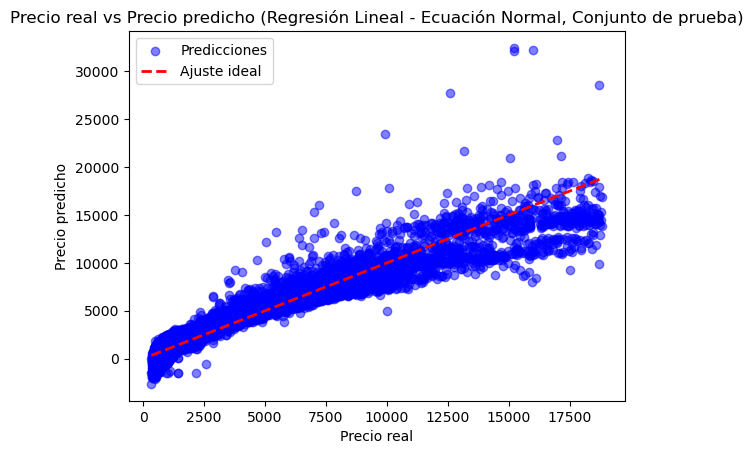

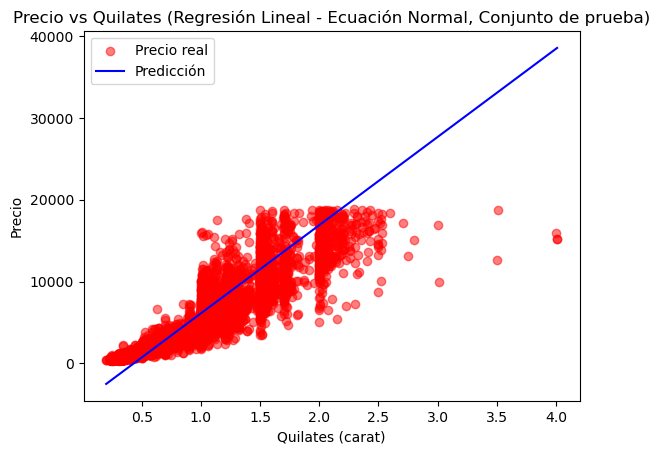

In [73]:
# Gráfico: Predicciones vs Valores Reales (conjunto de prueba)
plt.figure()
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ajuste ideal')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Precio real vs Precio predicho (Regresión Lineal - Ecuación Normal, Conjunto de prueba)')
plt.legend()
plt.show()




# Gráfico: Precio en función de una característica (ejemplo: quilates)
feature_idx = 0 
plt.figure()
plt.scatter(X_test[:, feature_idx], y_test, color='red', marker='o', alpha=0.5, label='Precio real')

X_range = np.linspace(X_test[:, feature_idx].min(), X_test[:, feature_idx].max(), 100)


X_mean = X_train.mean(axis=0)
X_range_full = np.tile(X_mean, (100, 1)) 
X_range_full[:, feature_idx] = X_range     


X_range_norm = np.concatenate([np.ones((100, 1)), X_range_full], axis=1)


y_pred_range = np.dot(X_range_norm, thetaNor)

plt.plot(X_range, y_pred_range, '-', color='blue', label='Predicción')
plt.xlabel('Quilates (carat)')
plt.ylabel('Precio')
plt.title('Precio vs Quilates (Regresión Lineal - Ecuación Normal, Conjunto de prueba)')
plt.legend()
plt.show()



# **regresion polinomica**

In [74]:
data = pd.read_csv('./diamonds.csv')

In [75]:
#cambiando los parametros de las columnas con valores string a avalores numericos
cut = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
data['cut'] = data['cut'].map(cut)


color = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
data['color'] = data['color'].map(color)


clarity = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
data['clarity'] = data['clarity'].map(clarity)



In [76]:
X = data[['carat','cut','color','clarity','depth','table','x','y','z']].values
y = data['price'].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
m_train = y_train.size  
m_test = y_test.size   

print(" x train:", X_train.shape)
print(" x test:", X_test.shape)
print(" y train:", y_train.shape)
print(" y test:", y_test.shape)

 x train: (43152, 9)
 x test: (10788, 9)
 y train: (43152,)
 y test: (10788,)


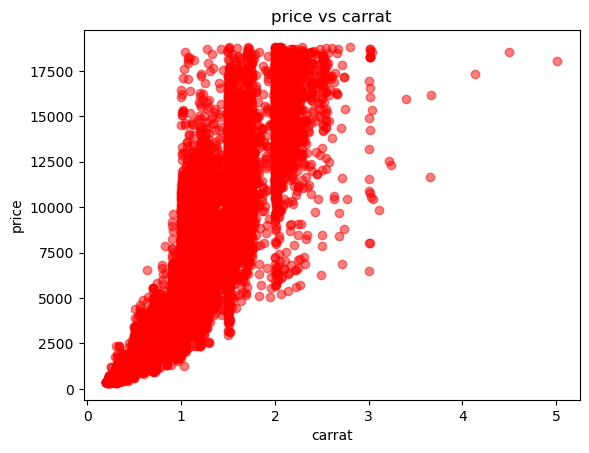

In [78]:
# Plotting function
def plotData(x, y, xlabel="Feature", ylabel="price"):
    fig = plt.figure()
    plt.scatter(x, y, color='red', marker='o', alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel}")
    plt.show()

# Example: Plot EnergyConsumption vs Revenue for training data
plotData(X_train[:, 0], y_train, xlabel="carrat", ylabel="price")


In [94]:
# Add polynomial features (degree 2)
def add_polynomial_features(X, degree=2):
    X_poly = X.copy()
    for i in range(X.shape[1]):
        X_poly = np.concatenate([X_poly, X[:, i:i+1] ** 2], axis=1)
    return X_poly

# Apply polynomial features to both train and test sets
X_train_poly = add_polynomial_features(X_train)
X_test_poly = add_polynomial_features(X_test)
print("Training shape with polynomial features:", X_train_poly.shape)
print("Test shape with polynomial features:", X_test_poly.shape)

Training shape with polynomial features: (43152, 18)
Test shape with polynomial features: (10788, 18)


In [80]:
# Feature normalization
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    # Avoid division by zero
    sigma[sigma == 0] = 1
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Normalize features (use training set statistics for both train and test)
X_train_norm, mu, sigma = featureNormalize(X_train_poly)
X_test_norm = (X_test_poly - mu) / sigma  # Normalize test set with train statistics
print("Normalized training features sample:\n", X_train_norm[:5])

Normalized training features sample:
 [[ 2.56005606 -1.70896512  0.3479487  -1.24690075 -2.55074762  2.93386055
   2.22945022  2.13820916  1.73820671  3.01699818 -1.51379665  0.13055168
  -0.9224318  -2.4883717   3.03151344  2.51091664  1.51235871  1.38558341]
 [ 0.44739205 -0.81219173  0.93662126 -1.24690075 -1.22042647  1.13957453
   0.74754991  0.65671016  0.5377332   0.15078621 -0.99098397  0.91726493
  -0.9224318  -1.21540526  1.12681067  0.67579425  0.36352089  0.33320577]
 [ 0.63753181  0.08458166 -0.82939642 -0.03213422  0.52999608  0.24243153
   0.76540413  0.70028366  0.79195112  0.3310159  -0.1196295  -0.91839931
  -0.25345098  0.52195368  0.22054081  0.69545414  0.39351239  0.53887995]
 [ 1.48259742 -1.70896512  0.93662126 -1.24690075 -0.17017294  3.38243206
   1.31888497  1.24930976  1.24389409  1.31805578 -1.51379665  0.91726493
  -0.9224318  -0.18149941  3.52688976  1.33455     0.79112646  0.92731865]
 [ 1.5248507  -0.81219173 -0.24072386  0.57524904  0.24992847 -0.20613

In [81]:
# Add intercept term
X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print("Training shape with intercept term:", X_train_norm.shape)
print("Test shape with intercept term:", X_test_norm.shape)

Training shape with intercept term: (43152, 19)
Test shape with intercept term: (10788, 19)


In [82]:
# Cost function for multiple features
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J

In [83]:
# Gradient descent for multiple features
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - (alpha / m) * np.dot((h - y), X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [84]:
# Train the model
alpha = 0.001  # Learning rate
num_iters = 10000  # Number of iterations
thetaPol = np.zeros(X_train_norm.shape[1])  # Initialize theta
thetaPol, J_history = gradientDescentMulti(X_train_norm, y_train, thetaPol, alpha, num_iters)

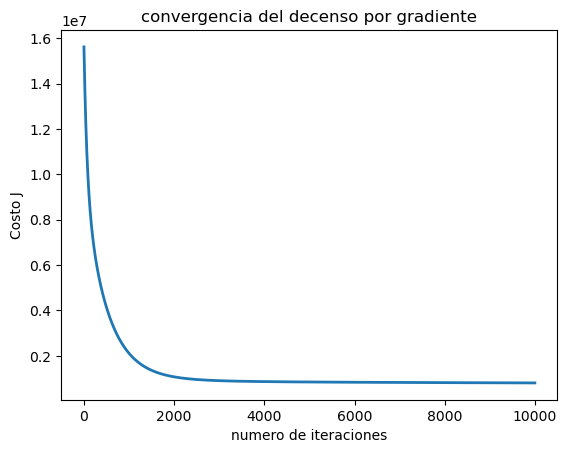

In [85]:
# Plot convergence of cost function
plt.figure()
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('numero de iteraciones')
plt.ylabel('Costo J')
plt.title('convergencia del decenso por gradiente')
plt.show()


In [86]:
print('Theta calculada por decenso por gradiente', thetaPol)

Theta calculada por decenso por gradiente [3939.31274729 1141.89630618  188.55093029  508.06630085  827.86694729
   23.90776742  -14.33082586  480.51524004  321.46695391  243.03704926
 1302.15949616  -72.81634699   -7.74554731  -28.21647818  -12.15676538
  -29.79224915  834.89913775  -97.36342335  -69.91452509]


In [87]:
# Evaluate on training set
y_train_pred = np.dot(X_train_norm, thetaPol)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("\nTraining set metrics:")
print(f'R² score on training set: {r2_train:.4f}')
print(f'Mean Squared Error (MSE) on training set: {mse_train:.4f}')
print(f'Mean Absolute Error (MAE) on training set: {mae_train:.4f}')
print(f'Root Mean Squared Error (RMSE) on training set: {rmse_train:.4f}')


Training set metrics:
R² score on training set: 0.8989
Mean Squared Error (MSE) on training set: 1609089.9924
Mean Absolute Error (MAE) on training set: 843.0810
Root Mean Squared Error (RMSE) on training set: 1268.4991


In [88]:
# Evaluate on test set
y_pred = np.dot(X_test_norm, thetaPol)

# Calculate accuracy metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R² score on test set: {r2:.4f}')
print(f'Mean Squared Error (MSE) on test set: {mse:.4f}')
print(f'Mean Absolute Error (MAE) on test set: {mae:.4f}')
print(f'Root Mean Squared Error (RMSE) on test set: {rmse:.4f}')


R² score on test set: 0.8973
Mean Squared Error (MSE) on test set: 1632778.8805
Mean Absolute Error (MAE) on test set: 839.2669
Root Mean Squared Error (RMSE) on test set: 1277.8024


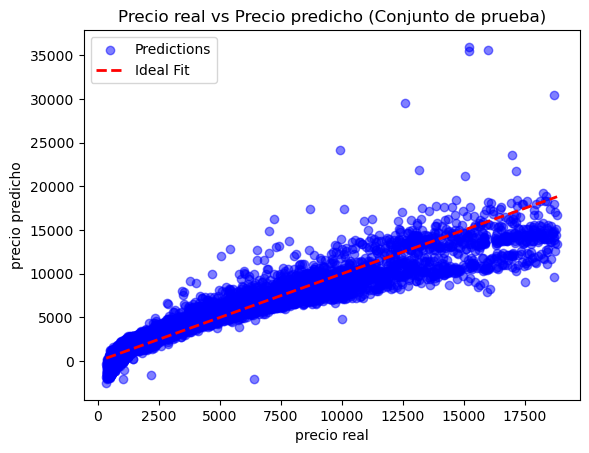

In [89]:
# Plot predictions vs actual values for test set
plt.figure()
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('precio real')
plt.ylabel('precio predicho')
plt.title('Precio real vs Precio predicho (Conjunto de prueba)')
plt.legend()
plt.show()

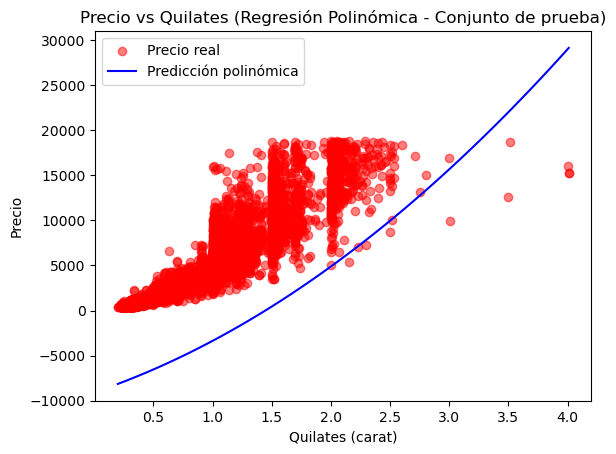

In [91]:
# Gráfico: Precio en función de una característica (ejemplo: quilates) con regresión polinómica
feature_idx = 0  
plt.figure()
plt.scatter(X_test[:, feature_idx], y_test, color='red', marker='o', alpha=0.5, label='Precio real')

# Generar rango de valores para esa característica
X_range = np.linspace(X_test[:, feature_idx].min(), X_test[:, feature_idx].max(), 100)

# Repetir el valor de X_range en todas las columnas (como en tu código original)
X_range_poly = add_polynomial_features(np.repeat(X_range[:, np.newaxis], X.shape[1], axis=1))

# Normalizar usando las medias (mu) y desviaciones (sigma) de tu entrenamiento
X_range_norm = (X_range_poly - mu) / sigma

# Agregar columna de 1's
X_range_norm = np.concatenate([np.ones((X_range_norm.shape[0], 1)), X_range_norm], axis=1)

# Predicciones polinómicas
y_pred_range = np.dot(X_range_norm, thetaPol)

# Dibujar la curva de predicción
plt.plot(X_range, y_pred_range, '-', color='blue', label='Predicción polinómica')

plt.xlabel('Quilates (carat)')
plt.ylabel('Precio')
plt.title('Precio vs Quilates (Regresión Polinómica - Conjunto de prueba)')
plt.legend()
plt.show()
